In [1]:
import os
import sv as SV
import numpy as np
import astropy.table as atable

from desitarget.sv1.sv1_targetmask import bgs_mask as sv1_bgs_mask
from desitarget.sv3.sv3_targetmask import bgs_mask as sv3_bgs_mask

from gama import gama_match

In [2]:
# -- plotting -- 
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['text.usetex'] = True
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['axes.linewidth'] = 1.5
mpl.rcParams['axes.xmargin'] = 1
mpl.rcParams['xtick.labelsize'] = 'x-large'
mpl.rcParams['xtick.major.size'] = 5
mpl.rcParams['xtick.major.width'] = 1.5
mpl.rcParams['ytick.labelsize'] = 'x-large'
mpl.rcParams['ytick.major.size'] = 5
mpl.rcParams['ytick.major.width'] = 1.5
mpl.rcParams['legend.frameon'] = False

In [3]:
# load compiled zsuccess rates to file
dat_dir = '/global/cscratch1/sd/chahah/bgs-cmxsv/sv-paper/'
#dat_dir = '/global/cscratch1/sd/mjwilson/desi/BGS/bgs-cmxsv/'
#dat_dir = '/Users/chahah/data/bgs_cmxsv/sv_paper/'

sv1_gals = atable.Table.read(os.path.join(dat_dir, 'sv1.bgs_exps.efftime160_200.zsuccess.v4.fits'))
sv3_gals = atable.Table.read(os.path.join(dat_dir, 'sv3.bgs_exps.efftime160_200.zsuccess.v4.fits'))
main_gals = atable.Table.read(os.path.join(dat_dir, 'main.bgs_exps.efftime160_200.zsuccess.v4.fits'))

SV1
6117 matching galaxies
0.002943 of them |dz/(1+z)| > 1e-3
1\%
29900 matching galaxies
0.001873 of them |dz/(1+z)| > 1e-3
Main
1622 matching galaxies
0.002466 of them |dz/(1+z)| > 1e-3


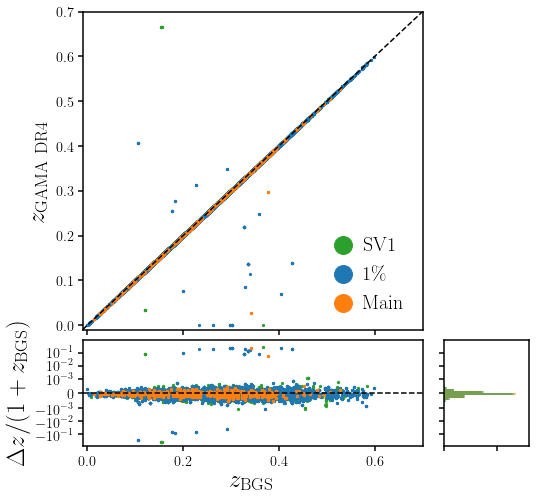

In [7]:
fig, ((sub0, sub2), (sub1, sub3)) = plt.subplots(2, 2, gridspec_kw={'height_ratios': [3, 1], 'width_ratios': [4, 1]}, figsize=(8,8))

for cat, label, clr in zip([sv1_gals, sv3_gals, main_gals], ['SV1', '1\%', 'Main'], ['C2', 'C0', 'C1']):
    cat  = gama_match(cat, dr=4)
    
    mask = cat['GAMA_Z'].mask
    
    cuts = (~mask & 
            (cat['ZSUCCESS'].data == True) & 
            (cat['GAMA_NQ'].data >= 3) & # only high quality GAMA redshifts
            (cat['GAMA_SURVEY_CODE'].data >= 3) # GAMA I & II (excluding sub programs)
           )
    
    z_gama = cat['GAMA_Z'].data[cuts]
    z_bgs = cat['Z'].data[cuts]
    
    sub0.scatter(z_bgs, z_gama, s=5, c=clr, rasterized=True, label=label)
    sub1.scatter(z_bgs, (z_bgs - z_gama)/(1+z_bgs), s=5, c=clr, rasterized=True, label=label)        
    
    ybin = np.array(list(np.linspace(0., 1e-3, 8)[1:-1]) + list(np.logspace(-3, np.log10(0.9), 8)))
    ybin = np.concatenate([-1*ybin[::-1], np.array([0]), ybin])
    sub3.hist((z_bgs - z_gama)/(1+z_bgs), bins=ybin, orientation='horizontal', density=True, alpha=0.5)
    print(label)
    print('%i matching galaxies' % len(z_gama))
    print('%f of them |dz/(1+z)| > 1e-3' % (np.sum(np.abs((z_bgs - z_gama)/(1+z_bgs)) > 1e-3)/np.float(len(z_gama))))
sub0.plot([-0.01, 1.], [-0.01, 1.], c='k', ls='--')
sub0.set_xlim(-0.01, 0.7)
sub0.set_xticklabels([])
sub0.set_ylim(-0.01, 0.7)
sub0.set_ylabel(r'$z_{\rm GAMA~DR4}$', fontsize=25)
sub0.legend(loc='lower right', handletextpad=0, markerscale=8, fontsize=20)    

sub1.axhline(0, color='k', linestyle='--')
sub1.set_xlim(-0.01, 0.7)
sub1.set_ylim(-0.9, 0.9)
sub1.set_yticklabels([-0.1, -1e-3, 0, 1e-3, 1e-1])
sub1.set_yscale('symlog', linthreshy=1e-3)
sub1.set_ylabel(r'$\Delta z / (1+z_{\rm BGS})$', fontsize=25)
sub1.set_xlabel(r'$z_{\rm BGS}$', fontsize=25)

sub2.axis('off')

sub3.set_xlim(0., 4e3)
sub3.set_xticklabels([])
sub3.set_ylim(-0.9, 0.9)
sub3.set_yscale('symlog', linthreshy=1e-3)
sub3.set_yticklabels([])

fig.subplots_adjust(hspace=0.05, wspace=0.1)
fig.savefig('figs/gama_zcomp.pdf', bbox_inches='tight')